In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import json
from ibm_watson import VisualRecognitionV4
from ibm_watson.visual_recognition_v4 import AnalyzeEnums, FileWithMetadata
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from IPython.display import clear_output

plt.rcParams['figure.figsize'] = [12, 5]

In [2]:
#retreiving data from the cloud object dtection model

In [3]:
authenticator = IAMAuthenticator(apikey="ZQBgX2TPs2CmC3wNLWGEr7X3xDmq42sDsqTZVCsjdke8")

In [7]:
obj = VisualRecognitionV4(version = '2020-10-04',authenticator=authenticator,)

In [8]:
obj.set_service_url(service_url = 'https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/2fa93f7c-36f0-48f9-abb1-15845fbe94e1')

### Result of single frames

In [10]:
with open('frames/4.png', 'rb') as honda_file,open('frames/5.png', 'rb') as dice_file:
    result = obj.analyze(
        collection_ids=["6a81543e-5dd3-40ac-9017-f127e3c63297"],
        features=[AnalyzeEnums.Features.OBJECTS.value],
        images_file=[
            FileWithMetadata(honda_file),
     
        ]).get_result()
    print(json.dumps(result, indent=2))

{
  "images": [
    {
      "source": {
        "type": "file",
        "filename": "4.png"
      },
      "dimensions": {
        "height": 401,
        "width": 1081
      },
      "objects": {
        "collections": [
          {
            "collection_id": "6a81543e-5dd3-40ac-9017-f127e3c63297",
            "objects": [
              {
                "object": "car",
                "location": {
                  "left": 523,
                  "top": 5,
                  "width": 142,
                  "height": 71
                },
                "score": 0.62185335
              },
              {
                "object": "car",
                "location": {
                  "left": 279,
                  "top": 1,
                  "width": 150,
                  "height": 81
                },
                "score": 0.6145427
              },
              {
                "object": "car",
                "location": {
                  "left": 13,
                  "

In [ ]:
result['images'][0]['objects']['collections'][0]['objects'][1]

In [ ]:
df = {'frame_no':[],'class':[],'left':[],'top':[],'width':[],'height':[]}

In [ ]:

for objects in result['images'][0]['objects']['collections'][0]['objects']:
    df['frame_no'].append(1)
    df['class'].append(objects['object'])
    df['left'].append(objects['location']['left'])
    df['top'].append(objects['location']['top'])
    df['width'].append(objects['location']['width'])
    df['height'].append(objects['location']['height'])

In [ ]:
pd.DataFrame(df)

In [11]:
#getting results for all frames
x = '='
tab = '\t'
df = {'frame_no':[],'class':[],'left':[],'top':[],'width':[],'height':[]}
for i in range(1,29):
    with open(f'frames/{i}.png', 'rb') as honda_file:
        result = obj.analyze(
            collection_ids=["6a81543e-5dd3-40ac-9017-f127e3c63297"],
            features=[AnalyzeEnums.Features.OBJECTS.value],
            images_file=[
                FileWithMetadata(honda_file),

            ], threshold=0.15).get_result()
        
        for objects in result['images'][0]['objects']['collections'][0]['objects']:
            if objects['object'] == 'car':
                df['frame_no'].append(i)
                df['class'].append(objects['object'])
                df['left'].append(objects['location']['left'])
                df['top'].append(objects['location']['top'])
                df['width'].append(objects['location']['width'])
                df['height'].append(objects['location']['height'])
        clear_output(wait = True)
        print(f'{i}/29[',end = '')
        print(x*i,end="")
        print('> ]',end = '')

28/29[============================> ]

In [12]:
print('>',' '*28,']')

>                              ]


In [13]:
df = pd.DataFrame(df)


In [14]:
df

,frame_no,class,left,top,width,height
0,1,car,349,0,140,66
1,1,car,734,137,154,85
2,1,car,130,64,134,82
3,1,car,535,274,107,68
4,1,car,494,195,124,68
...,...,...,...,...,...,...
241,28,car,185,284,135,76
242,28,car,0,21,104,84
243,28,car,466,95,112,81
244,28,car,106,89,89,59


In [15]:
df.to_excel('detected_cars_with_box_data.xlsx',index = False)

In [16]:
df.left[0]

349

In [17]:
img = cv2.imread('frames/1.png')

In [18]:
i = 3

In [19]:
cv2.rectangle(img,(df.left[i],df.top[i]),
              (df.left[i]+df.width[i],df.top[i]+df.height[i])
              ,(255,0,0), 2)

array([[[163, 175, 180],
        [163, 175, 180],
        [161, 173, 178],
        ...,
        [162, 180, 182],
        [162, 180, 182],
        [163, 181, 183]],

       [[162, 175, 178],
        [162, 175, 178],
        [161, 174, 177],
        ...,
        [159, 177, 179],
        [162, 180, 182],
        [163, 181, 183]],

       [[165, 178, 181],
        [163, 176, 179],
        [163, 176, 179],
        ...,
        [159, 177, 179],
        [159, 177, 179],
        [161, 179, 181]],

       ...,

       [[146, 151, 151],
        [146, 151, 151],
        [147, 152, 152],
        ...,
        [144, 147, 147],
        [144, 147, 147],
        [144, 147, 147]],

       [[145, 150, 150],
        [145, 150, 150],
        [145, 150, 150],
        ...,
        [144, 147, 147],
        [144, 147, 147],
        [146, 149, 149]],

       [[145, 150, 150],
        [145, 150, 150],
        [145, 150, 150],
        ...,
        [144, 147, 147],
        [146, 149, 149],
        [146, 149, 149]]

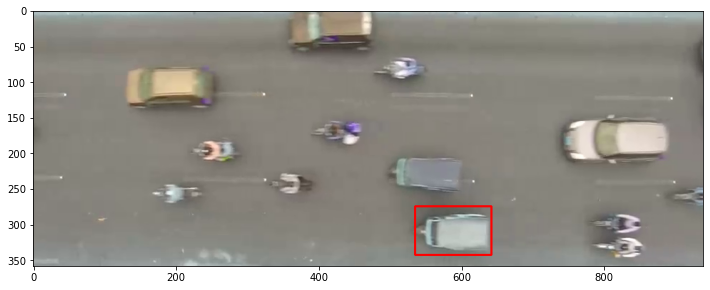

In [20]:

plt.imshow(img)

In [21]:
#generating vehicles detected images
for i in range(1,29):
    img = cv2.imread(f'frames/{i}.png')
    temp_df = df[df['frame_no'] == i]
    for j in range(temp_df.shape[0]):
        cv2.rectangle(img,(temp_df.left.iloc[j],temp_df.top.iloc[j]),
              (temp_df.left.iloc[j]+temp_df.width.iloc[j],temp_df.top.iloc[j]+temp_df.height.iloc[j])
              ,(0,0,255), 2)
        cv2.putText(img,'CAR',(temp_df.left.iloc[j],temp_df.top.iloc[j]),cv2.FONT_HERSHEY_SIMPLEX
              ,0.7,(0,0,255),2)
    cv2.imwrite(f'ML_results/cars_results/ML_{i}.png',img)

In [22]:
#counting total no of cars
df1 = {'Frame_no':[],'cars_count':[]}
for i in range(1,29):
    df1['Frame_no'].append(i)
    df1['cars_count'].append(len(df[df['frame_no'] == i]))

In [23]:
df1 = pd.DataFrame(df1)
df1

,Frame_no,cars_count
0,1,5
1,2,8
2,3,10
3,4,9
4,5,12
5,6,7
6,7,10
7,8,5
8,9,8
9,10,11


In [24]:
#finding total area per frames
#generating vehicles detected images
car_area_per_pixel = []
for i in range(1,29):
    img = cv2.imread(f'frames/{i}.png')
    img = np.zeros((img.shape[0],img.shape[1],img.shape[2]),dtype = np.uint8)
    temp_df = df[df['frame_no'] == i]
    for j in range(temp_df.shape[0]):
        cv2.rectangle(img,(temp_df.left.iloc[j],temp_df.top.iloc[j]),
              (temp_df.left.iloc[j]+temp_df.width.iloc[j],temp_df.top.iloc[j]+temp_df.height.iloc[j])
              ,(0,0,255), -1)
    non_zero = np.count_nonzero(img)
    car_area_per_pixel.append(non_zero)

In [25]:
df1['car_area'] = car_area_per_pixel
df1

,Frame_no,cars_count,car_area
0,1,5,50059
1,2,8,90967
2,3,10,121915
3,4,9,140427
4,5,12,117624
5,6,7,91667
6,7,10,133859
7,8,5,62914
8,9,8,111335
9,10,11,128425


In [26]:
df1['car_area_in_percent'] = (df1['car_area'] /   (312*981))*100
df1

,Frame_no,cars_count,car_area,car_area_in_percent
0,1,5,50059,16.355302
1,2,8,90967,29.720785
2,3,10,121915,39.832131
3,4,9,140427,45.880381
4,5,12,117624,38.430173
5,6,7,91667,29.949489
6,7,10,133859,43.734481
7,8,5,62914,20.555294
8,9,8,111335,36.375428
9,10,11,128425,41.959082


In [27]:
df1['density'] = df1['cars_count']/28
df1

,Frame_no,cars_count,car_area,car_area_in_percent,density
0,1,5,50059,16.355302,0.178571
1,2,8,90967,29.720785,0.285714
2,3,10,121915,39.832131,0.357143
3,4,9,140427,45.880381,0.321429
4,5,12,117624,38.430173,0.428571
5,6,7,91667,29.949489,0.250000
6,7,10,133859,43.734481,0.357143
7,8,5,62914,20.555294,0.178571
8,9,8,111335,36.375428,0.285714
9,10,11,128425,41.959082,0.392857


In [28]:
df1.to_csv("ML_CAR_detection.csv",index = False)

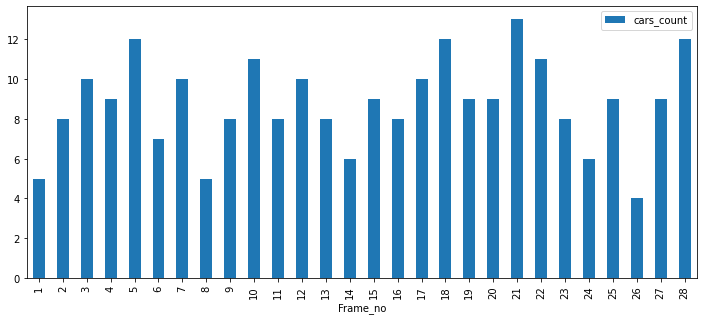

In [29]:
df1.plot(x = 'Frame_no',y = 'cars_count',kind = 'bar')

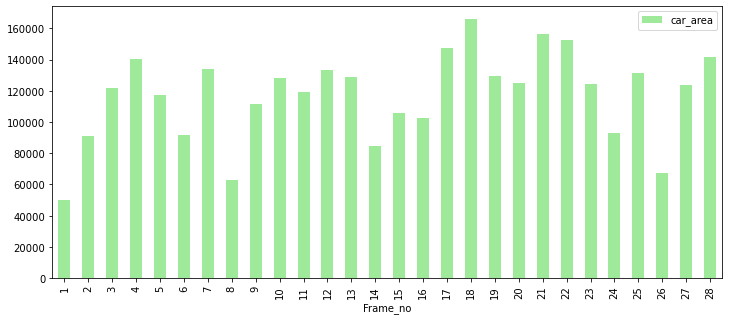

In [30]:
df1.plot(x = 'Frame_no',y = 'car_area',kind = 'bar',color = '#9fea9a')

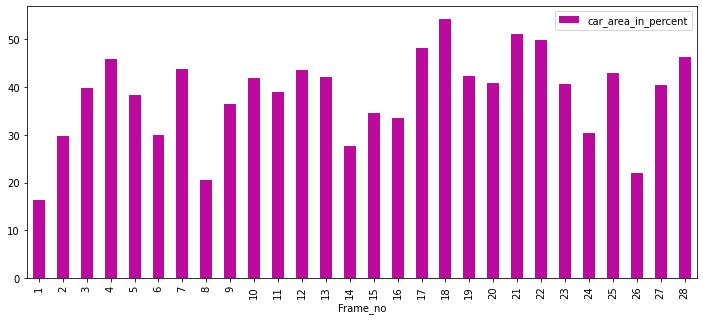

In [31]:
df1.plot(x = 'Frame_no',y = 'car_area_in_percent',kind = 'bar',color = '#bb0a9e')

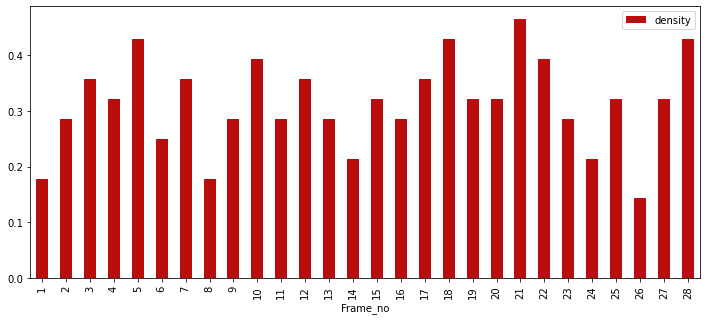

In [32]:
fig = df1.plot(x = 'Frame_no',y = 'density',kind = 'bar',color = '#ba0e0e')

In [33]:
pd.read_csv('ML_CAR_detection.csv')

,Frame_no,cars_count,car_area,car_area_in_percent,density
0,1,5,50059,16.355302,0.178571
1,2,8,90967,29.720785,0.285714
2,3,10,121915,39.832131,0.357143
3,4,9,140427,45.880381,0.321429
4,5,12,117624,38.430173,0.428571
5,6,7,91667,29.949489,0.250000
6,7,10,133859,43.734481,0.357143
7,8,5,62914,20.555294,0.178571
8,9,8,111335,36.375428,0.285714
9,10,11,128425,41.959082,0.392857
